<a href="https://colab.research.google.com/github/obtmc/test/blob/Olivia-Bianca-Tavares-de-Melo-Cunha/C%C3%B3pia_de_Equipe_6_Mini_projeto_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K-means**
**Mini-projeto 3 - Sistemas Inteligentes**

Prof. Germano Crispim Vasconcelos

Equipe 6
- Alice Oliveira - aoqb
- Ana Albuquerque - alas3
- Enrique Laborão - elm2
- Victória Luisi - vlsc
- Olivia Tavares - obtmc

## ⚙️ **Setup**

Importando dependências, conectando Google Drive, lendo datasets e criando os respectivos dataframes.

### Dependências

In [ ]:
import math
import numpy as np 
import pandas as pd

import seaborn as sns

from time import time

!pip install kneed
from kneed import KneeLocator

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from numpy.linalg import norm
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, silhouette_samples, silhouette_score, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 28.4 MB/s eta 0:00:00


### Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

base_path = '/content/drive/MyDrive/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Upando datasets


- U.S. News and World Report’s College Data: https://www.kaggle.com/datasets/flyingwombat/us-news-and-world-reports-college-data/data


In [ ]:
college_dataset_path = base_path + 'Colab Notebooks/College.csv'

### Lendo datasets

In [ ]:
college_df = pd.read_csv(college_dataset_path)
college_df

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


### Funções

In [ ]:
def Kmeans(TITLE, K, INIT, RANDOM_STATE, N_INIT, MAX_ITER, DATA, PLOT):# Executando K-Means
  t0 = time()
  kmeans = KMeans(n_clusters=K, init=INIT, random_state=RANDOM_STATE, n_init=N_INIT, max_iter=MAX_ITER)
  kmeans.fit(DATA)
  t1 = time()
  time_kmeans = t1 - t0
  inertia_kmeans = kmeans.inertia_

  # Calculando distâncias intra_cluster e inter-cluster
  intra_cluster_distance = sum([np.sum((DATA[kmeans.labels_ == i] - kmeans.cluster_centers_[i]) ** 2) for i in range(kmeans.n_clusters)])
  inter_cluster_distance = kmeans.inertia_ - intra_cluster_distance
  #inter_cluster_distance_kmeans = silhouette_score(DATA, kmeans.labels_)
  silhouette_avg = silhouette_score(DATA, kmeans.labels_)
 
  # Imprimindo resultados
  Kmeans_report(TITLE, time_kmeans, intra_cluster_distance, inter_cluster_distance, silhouette_avg)

  # Plotando gráfico
  if(PLOT == 1):
    Kmeans_plot_clusters(kmeans.labels_, kmeans.cluster_centers_, DATA)

  return kmeans,time_kmeans, intra_cluster_distance, inter_cluster_distance, silhouette_avg

In [ ]:
def Kmeans_report(TITLE,time_kmeans, intra_cluster_distance, inter_cluster_distance, silhouette_avg):
  print(f"\n\t\t\t\tK-Means {TITLE}\n")
  print("Tempo de Execução: \t\t{:.4f}s".format(time_kmeans))
  print("Distância Intra-cluster: \t{:.4f}".format(intra_cluster_distance))
  print("Distância Inter-cluster: \t{:.4f}".format(inter_cluster_distance))
  print("Silhouette Score: \t\t{:.4f}".format(silhouette_avg))

In [ ]:
def Kmeans_plot_clusters(labels, centroids, DATA):
  # selecionando a segunda e última coluna do array de dados
  x = DATA[:, 0]
  y = DATA[:, 1]

  # Plota os pontos coloridos pelos clusters
  plt.scatter(x,y, c=labels)

  # Plota os centróides em vermelho
  plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, linewidths=1, color='r')

  # Mostra o gráfico
  plt.show()

In [ ]:
def report(title, y_test, y_pred):
  report = classification_report(y_test, y_pred)
  print(title)
  print(report)
  plot_confusion_matrix(y_test, y_pred)
  
def plot_confusion_matrix(y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred)
  fig, ax = plt.subplots(figsize=(4,4))
  sns.heatmap(cm, annot=True)

## 📘 **Projeto: College Dataset**

### 🔎 Análise e limpeza do Dataset

In [ ]:
college_df.info()
college_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

Unnamed: 0     0
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

Antes de treinar o modelo, é necessário remover a colunas do nome da universidade e separar a coluna da label 'Private' para garantir uma análise não supervisionada.

In [ ]:
labels_private = college_df['Private'].copy()

college_df_to_normalize = college_df.copy()
college_df_to_normalize.drop(['Unnamed: 0', 'Private'], axis=1, inplace=True)
college_df_to_normalize.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


Normalizando os dados:

In [ ]:
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(college_df_to_normalize)
normalized_data

array([[0.03288693, 0.04417701, 0.10791254, ..., 0.1875    , 0.0726714 ,
        0.46296296],
       [0.04384229, 0.07053089, 0.07503539, ..., 0.25      , 0.13838671,
        0.42592593],
       [0.0280549 , 0.03903572, 0.04734938, ..., 0.46875   , 0.10460535,
        0.40740741],
       ...,
       [0.04198863, 0.07018813, 0.10382256, ..., 0.3125    , 0.09683865,
        0.36111111],
       [0.22127341, 0.09067713, 0.20166745, ..., 0.765625  , 0.70126492,
        0.82407407],
       [0.06056693, 0.06790312, 0.10319333, ..., 0.4375    , 0.02494015,
        0.82407407]])

In [ ]:
college_df_normalized = pd.DataFrame(normalized_data, columns=college_df_to_normalize.columns)
college_df_normalized.head()


,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,0.032887,0.044177,0.107913,0.231579,0.472527,0.087164,0.024548,0.263430,0.239596,0.157754,0.297710,0.652632,0.710526,0.418231,0.187500,0.072671,0.462963
1,0.043842,0.070531,0.075035,0.157895,0.219780,0.080752,0.056148,0.513430,0.736129,0.291444,0.190840,0.221053,0.078947,0.260054,0.250000,0.138387,0.425926
2,0.028055,0.039036,0.047349,0.221053,0.450549,0.028473,0.004488,0.460227,0.310530,0.135472,0.139695,0.473684,0.552632,0.278820,0.468750,0.104605,0.407407
3,0.006998,0.010549,0.016045,0.621053,0.879121,0.011776,0.002839,0.548554,0.578499,0.157754,0.095420,0.884211,0.960526,0.139410,0.578125,0.298415,0.453704
4,0.002333,0.002818,0.003146,0.157895,0.384615,0.003492,0.039753,0.269628,0.368852,0.313725,0.190840,0.715789,0.631579,0.252011,0.031250,0.145833,0.046296


### Testando diferentes métodos para inicalização de K

#### Método do Cotovelo (Elbow)

Abaixo usamos o método Elbow para encontrar o melhor K admitindo valores de 1 a 10.

In [ ]:
inertia = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0,n_init=10).fit(normalized_data)
    inertia.append(kmeans.inertia_)

In [ ]:
k_elbow = KneeLocator(x= k_range, y=inertia, curve="convex", direction='decreasing').knee

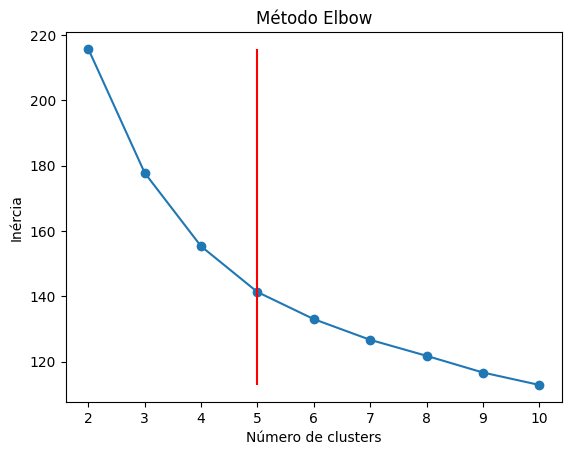

In [ ]:
plt.plot(k_range, inertia, '-o')
plt.title('Método Elbow')
plt.xlabel('Número de clusters')
plt.ylabel('Inércia')
plt.xticks(k_range)
plt.vlines(x=k_elbow, ymin=min(inertia), ymax=max(inertia), color="red")
plt.show()

Temos que o melhor valor para K seria 5 a partir do método do cotovelo

####Calinski-Harabasz

In [ ]:
# Calcular o índice Calinski-Harabasz para diferentes valores de k
scores = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10).fit(normalized_data)
    score = calinski_harabasz_score(normalized_data, kmeans.labels_)
    scores.append(score)

In [ ]:
best_n_clusters = 2 + scores.index(max(scores))

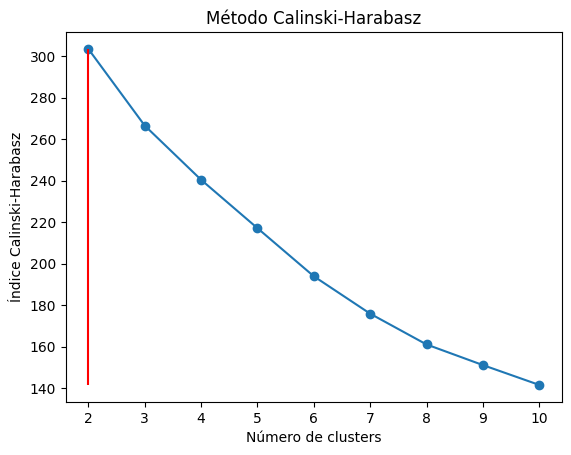

In [ ]:
# Plotar o gráfico do índice Calinski-Harabasz em função do número de clusters
plt.plot(k_range, scores, '-o')
plt.xlabel('Número de clusters')
plt.ylabel('Índice Calinski-Harabasz')
plt.title('Método Calinski-Harabasz')
plt.vlines(x=best_n_clusters, ymin=min(scores), ymax=max(scores), color="red")
plt.show()

- Fazendo uma análise da curva do gráfico observamos que o índice Calinski-Harabasz atinge valor máximo em K igual a 2.

####Davies-Bouldin

In [ ]:
# Calculando o índice Davies-Bouldin para cada valor de k
scores = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10).fit(normalized_data)
    score = davies_bouldin_score(normalized_data, kmeans.labels_)
    scores.append(score)

In [ ]:
k_Davies_Bouldin = 2 + scores.index(min(scores))

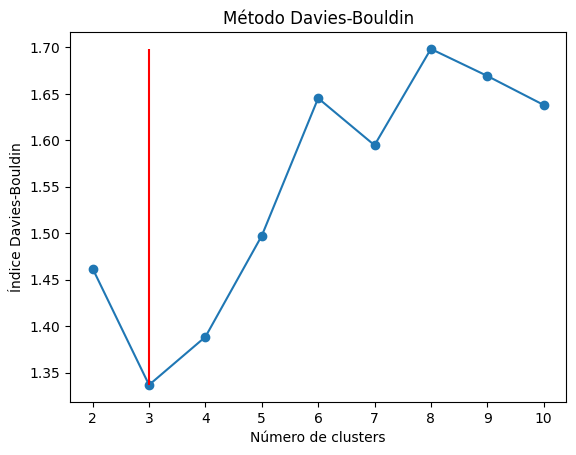

In [ ]:
# Plotar o gráfico do índice Davies-Bouldin em função do número de clusters
plt.plot(k_range, scores, '-o')
plt.xlabel('Número de clusters')
plt.ylabel('Índice Davies-Bouldin')
plt.title('Método Davies-Bouldin')
plt.vlines(x=k_Davies_Bouldin, ymin=min(scores), ymax=max(scores), color="red")
plt.show()

Fazendo uma análise da curva do gráfico observamos que o índice de Davies-Bouldin atinge valor mínimo em K igual a 3.

####Silhouette

In [ ]:
# Calculando o índice Silhouette para cada valor de k
scores = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init = 10).fit(normalized_data)
    score = silhouette_score(normalized_data, kmeans.labels_)
    scores.append(score)

In [ ]:
k_Silhouette = 2 + scores.index(max(scores))

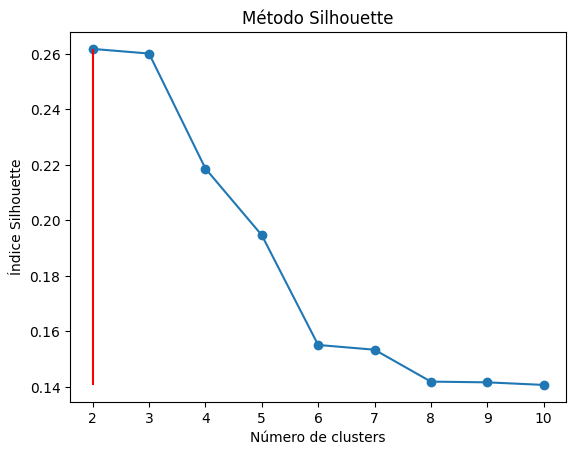

In [ ]:
# Plotar o gráfico do índice Silhouette em função do número de clusters
plt.plot(k_range, scores, '-o')
plt.xlabel('Número de clusters')
plt.ylabel('Índice Silhouette')
plt.title('Método Silhouette')
plt.vlines(x=k_Silhouette, ymin=min(scores), ymax=max(scores), color="red")
plt.show()

- Fazendo uma análise da curva do gráfico observamos que o índice de Silhouette atinge valor máximo em K igual a 2.




####BIC

In [ ]:
from scipy.stats import multivariate_normal

# Calculando o critério BIC para cada valor de k
k_range = range(2, 11)
scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10).fit(normalized_data)
    bic = 0

    for i in range(k):
      cluster = normalized_data[kmeans.labels_ == i]
      num_params = len(cluster[0])*k + k
      likelihood = np.sum(multivariate_normal.logpdf(cluster, kmeans.cluster_centers_[i], np.cov(cluster.T)))

      bic += likelihood - 0.5 * num_params * np.log(len(cluster))

    scores.append(bic)

In [ ]:
k_Bic = 2 + scores.index(max(scores))

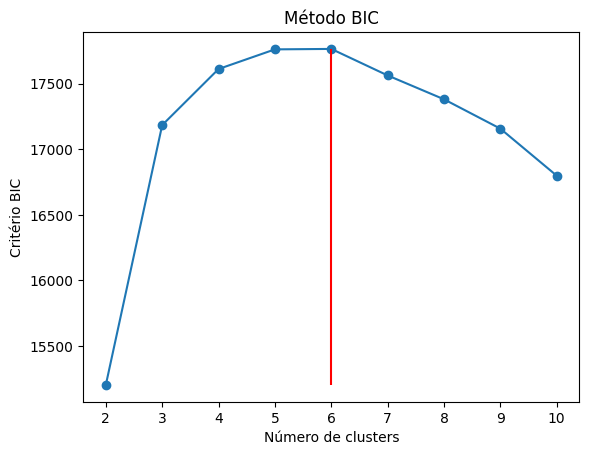

In [ ]:
# Plotando o gráfico do critério BIC em função do número de componentes
plt.plot(k_range, scores,'-o')
plt.xlabel('Número de clusters')
plt.ylabel('Critério BIC')
plt.title('Método BIC')
plt.vlines(x=k_Bic, ymin=min(scores), ymax=max(scores), color="red")
plt.show()

- Fazendo uma análise da curva do gráfico observamos que o critério de BIC atinge valor máximo em K igual a 6.



Ao todo, encontramos 4 valores diferentes para K: 2, 3, 5 e 6. No entanto o valor 2 é encontrado duas vezes, uma pelo método Calinski-Harabasz e outra pelo método Silhouette.

### 🛠️ Agrupando com K-means

In [ ]:
# Especificando parâmetros
K = 2
RANDOM_STATE = 42
N_INIT = 1
MAX_ITER = 20 # para essa base dados os resultados convergem a partir de 10 interações

####Encontrando centróides iniciais randomicamente e executando K-means apenas 1 vez

In [ ]:
# Executando K-Means apenas 1 vez
kmeans_1, time_kmeans_1, intra_cluster_distance_1, inter_cluster_distance_1, silhouette_avg_1 = Kmeans('1', K, 'random', RANDOM_STATE, 1, 1, normalized_data, 0)


				K-Means 1

Tempo de Execução: 		0.0817s
Distância Intra-cluster: 	235.1405
Distância Inter-cluster: 	-0.0000
Silhouette Score: 		0.2192


Essa aleatoriedade de escolher pontos k-centróides resulta no problema de sensibilidade de inicialização. Este problema tende a afetar os agrupamentos finais formados. Já que os clusters formados finais dependem de como os centróides iniciais foram escolhidos.

####Encontrando centróides iniciais aplicando K-means repetidas vezes: 

- Repetimos o algoritmo e a inicialização dos centróides várias vezes como forma de diminuir a dependência da escolha dos centróides inicias.

In [ ]:
# Executando K-Means repetidas vez
kmeans_repeat, time_kmeans_repeat, intra_cluster_distance_repeat, inter_cluster_distance_repeat, silhouette_avg_repeat = Kmeans('R', K, 'random', RANDOM_STATE, N_INIT, MAX_ITER, normalized_data, 0)


				K-Means R

Tempo de Execução: 		0.0160s
Distância Intra-cluster: 	215.7817
Distância Inter-cluster: 	-0.0000
Silhouette Score: 		0.2612


####Encontrando centróides usando K-Means++: 
- K-Means++ é uma técnica inteligente de inicialização de centróide.

In [ ]:
# Executando K-Means++
kmeans_plusplus, time_kmeans_plusplus, intra_cluster_distance_plusplus, inter_cluster_distance_plusplus, silhouette_avg_plusplus = Kmeans('++', K, 'k-means++', RANDOM_STATE, N_INIT, MAX_ITER, normalized_data, 0)


				K-Means ++

Tempo de Execução: 		0.0232s
Distância Intra-cluster: 	215.7761
Distância Inter-cluster: 	0.0000
Silhouette Score: 		0.2618


In [ ]:
# Comparando resultados
print("\n\t\t\t\tK-Means 1\t\tK-Means R\t\tK-Means++\n")
print("Tempo Execução: \t\t{:.4f}s\t\t\t{:.4f}s \t\t{:.4f}s".format(time_kmeans_1, time_kmeans_repeat, time_kmeans_plusplus))
print("Distância Intra-cluster: \t{:.4f}\t\t{:.4f}\t\t{:.4f}".format(intra_cluster_distance_1, intra_cluster_distance_repeat, intra_cluster_distance_plusplus))
print("Distância Inter-cluster: \t{:.4f}\t\t\t{:.4f}\t\t\t{:.4f}".format(inter_cluster_distance_1, inter_cluster_distance_repeat, inter_cluster_distance_plusplus))
print("Silhouette Score: \t\t{:.4f}\t\t\t{:.4f}\t\t\t{:.4f}".format(silhouette_avg_1, silhouette_avg_repeat, silhouette_avg_plusplus))


				K-Means 1		K-Means R		K-Means++

Tempo Execução: 		0.0817s			0.0160s 		0.0232s
Distância Intra-cluster: 	235.1405		215.7817		215.7761
Distância Inter-cluster: 	-0.0000			-0.0000			0.0000
Silhouette Score: 		0.2192			0.2612			0.2618


### 🛠️ Agrupando com K-medoids

In [ ]:
# Treinando K-Medoids
t0 = time()
kmedoids = KMedoids(n_clusters=2, random_state=RANDOM_STATE, max_iter=MAX_ITER)
kmedoids.fit(normalized_data)
t1 = time()

# Calculando tempo de execução
time_kmedoids = t1 - t0

# Calculando distâncias intra e inter cluster
intra_cluster_distance_kmedoids = sum([np.sum((normalized_data[kmedoids.labels_ == i] - kmedoids.cluster_centers_[i]) ** 2) for i in range(kmedoids.n_clusters)])
inter_cluster_distance_kmedoids = kmedoids.inertia_ - intra_cluster_distance_kmedoids
silhouette_avg_kmedoids = silhouette_score(normalized_data, kmedoids.labels_)

###🛠️ Comparando K-means com K-medoids

In [ ]:
# Comparando resultados
print("\n\t\t\t\tK-Means 1\tK-Means R\tK-Means++ \tK-Menoids\n")
print("Tempo Execução: \t\t{:.4f}s\t\t{:.4f}s \t{:.4f}s \t{:.4f}s".format(time_kmeans_1, time_kmeans_repeat, time_kmeans_plusplus, time_kmedoids))
print("Distância Intra-cluster: \t{:.4f}\t{:.4f}\t{:.4f}\t{:.4f}".format(intra_cluster_distance_1, intra_cluster_distance_repeat, intra_cluster_distance_plusplus, intra_cluster_distance_kmedoids))
print("Distância Inter-cluster: \t{:.4f}\t\t{:.4f}\t\t{:.4f}\t\t{:.4f}".format(inter_cluster_distance_1, inter_cluster_distance_repeat, inter_cluster_distance_plusplus, inter_cluster_distance_kmedoids))
print("Silhouette Score: \t\t{:.4f}\t\t{:.4f}\t\t{:.4f}\t\t{:.4f}".format(silhouette_avg_1, silhouette_avg_repeat, silhouette_avg_plusplus, silhouette_avg_kmedoids))


				K-Means 1	K-Means R	K-Means++ 	K-Menoids

Tempo Execução: 		0.0817s		0.0160s 	0.0232s 	0.1548s
Distância Intra-cluster: 	235.1405	215.7817	215.7761	244.5338
Distância Inter-cluster: 	-0.0000		-0.0000		0.0000		158.9361
Silhouette Score: 		0.2192		0.2612		0.2618		0.2457


###Aplicando K-means para diferentes K

In [ ]:
K=3
kmeans_k_3 = Kmeans('K-3', K, 'k-means++', RANDOM_STATE, N_INIT, MAX_ITER, normalized_data, 0)


				K-Means K-3

Tempo de Execução: 		0.0270s
Distância Intra-cluster: 	179.6964
Distância Inter-cluster: 	-0.0000
Silhouette Score: 		0.2448


- Silhouette Score(0.2448) muito próximo ao Silhouette Score do K-Menoids(0.2457) para K=2. Cluster mais compactos quase igualmente distantes.

In [ ]:
K=5
kmeans_k_5 = Kmeans('K-5', K, 'k-means++', RANDOM_STATE, N_INIT, MAX_ITER, normalized_data, 0)


				K-Means K-5

Tempo de Execução: 		0.1089s
Distância Intra-cluster: 	141.3057
Distância Inter-cluster: 	0.0000
Silhouette Score: 		0.1929


In [ ]:
K=6
kmeans_k_6 = Kmeans('K-6', K, 'k-means++', RANDOM_STATE, N_INIT, MAX_ITER, normalized_data, 0)


				K-Means K-6

Tempo de Execução: 		0.0131s
Distância Intra-cluster: 	133.0091
Distância Inter-cluster: 	0.0000
Silhouette Score: 		0.1565


### Visualizando Clusters em 2 dimensões

In [ ]:
# Reduz a dimensionalidade dos dados para 2 dimensões usando PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(normalized_data)


				K-Means PCA-K-2

Tempo de Execução: 		0.2316s
Distância Intra-cluster: 	106.0967
Distância Inter-cluster: 	0.0000
Silhouette Score: 		0.4181


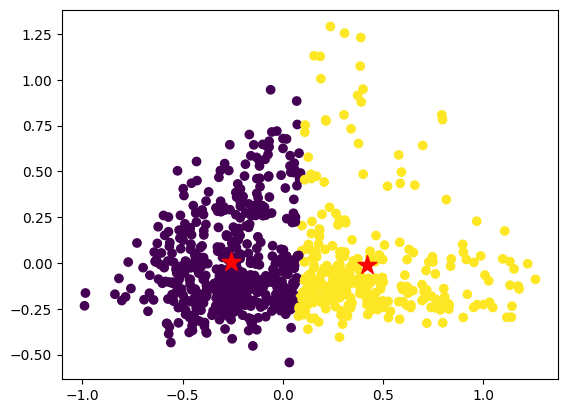

In [ ]:
K=2
kmeans_pca_2 = []
kmeans_pca_2 = Kmeans('PCA-K-2',K, 'k-means++', RANDOM_STATE,N_INIT, MAX_ITER, X_pca, 1)


				K-Means PCA-K-3

Tempo de Execução: 		0.0173s
Distância Intra-cluster: 	68.8794
Distância Inter-cluster: 	0.0000
Silhouette Score: 		0.4463


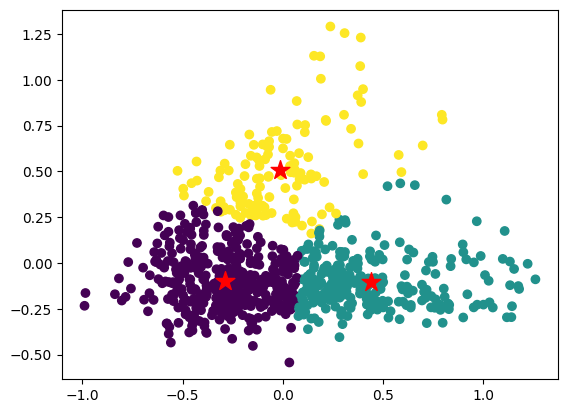

In [ ]:
K=3
kmeans_pca_3 = []
kmeans_pca_3 = Kmeans('PCA-K-3',K, 'k-means++', RANDOM_STATE,N_INIT, MAX_ITER, X_pca, 1)


				K-Means PCA-K-3

Tempo de Execução: 		0.0203s
Distância Intra-cluster: 	38.8066
Distância Inter-cluster: 	-0.0000
Silhouette Score: 		0.4049


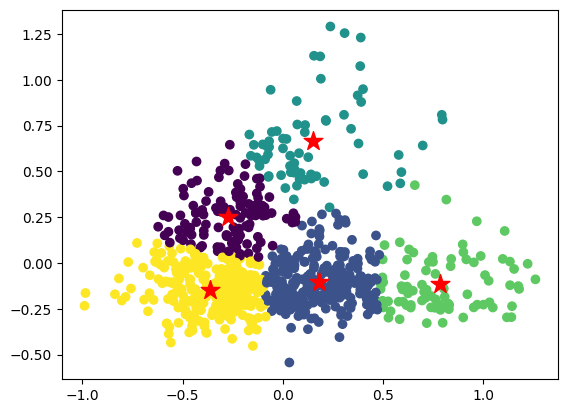

In [ ]:
K=5
kmeans_pca_5 = []
kmeans_pca_5 = Kmeans('PCA-K-3',K, 'k-means++', RANDOM_STATE,N_INIT, MAX_ITER, X_pca, 1)


				K-Means PCA

Tempo de Execução: 		0.1316s
Distância Intra-cluster: 	32.0343
Distância Inter-cluster: 	0.0000
Silhouette Score: 		0.3677


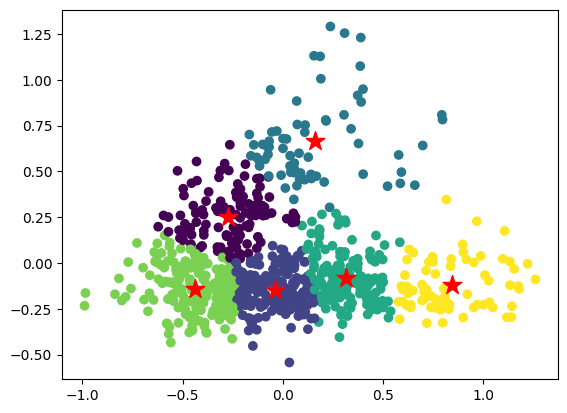

In [ ]:
K=6
kmeans_pca_6 = []
kmeans_pca_6 = Kmeans('PCA',K, 'k-means++', RANDOM_STATE,N_INIT, MAX_ITER, X_pca, 1)

###Consultando aos Clusters

In [ ]:
# Adição dos rótulos de cluster ao dataframe
labels = kmeans_plusplus.labels_
college_df_normalized['Cluster'] = labels

# Calculando a correlação de Pearson entre a coluna Cluster e as outras colunas
correlation = college_df_normalized.corrwith(college_df_normalized['Cluster'], method='pearson')

# Imprimindo as correlações
print(correlation)

Apps           0.245538
Accept         0.194207
Enroll         0.112472
Top10perc      0.672709
Top25perc      0.682093
F.Undergrad    0.061641
P.Undergrad   -0.140613
Outstate       0.671480
Room.Board     0.478175
Books          0.076011
Personal      -0.186560
PhD            0.575211
Terminal       0.576290
S.F.Ratio     -0.370059
perc.alumni    0.508286
Expend         0.544036
Grad.Rate      0.527491
Cluster        1.000000
Private       -0.224734
dtype: float64


In [ ]:
# Adição dos rótulos de cluster ao dataframe
labels = kmeans_k_3[0].labels_
college_df_normalized['Cluster'] = labels

# Calculando a correlação de Pearson entre a coluna Cluster e as outras colunas
correlation = college_df_normalized.corrwith(college_df_normalized['Cluster'], method='pearson')

# Imprimindo as correlações
print(correlation)

Apps          -0.560549
Accept        -0.592231
Enroll        -0.636022
Top10perc     -0.277964
Top25perc     -0.382045
F.Undergrad   -0.657272
P.Undergrad   -0.422464
Outstate      -0.016492
Room.Board    -0.070028
Books         -0.110930
Personal      -0.190217
PhD           -0.584271
Terminal      -0.588145
S.F.Ratio     -0.157717
perc.alumni    0.037912
Expend        -0.162615
Grad.Rate     -0.027006
Cluster        1.000000
Private       -0.549164
dtype: float64


**Como estão distribuídas as universidades públicas e privadas entre os clusters?**

Antes é necessário converter os dados da coluna 'Private' de string para valor numérico.

Private (Yes = 0, No = 1)

In [ ]:
college_df_normalized['Private'] = labels_private.map({"Yes": 0, "No": 1})

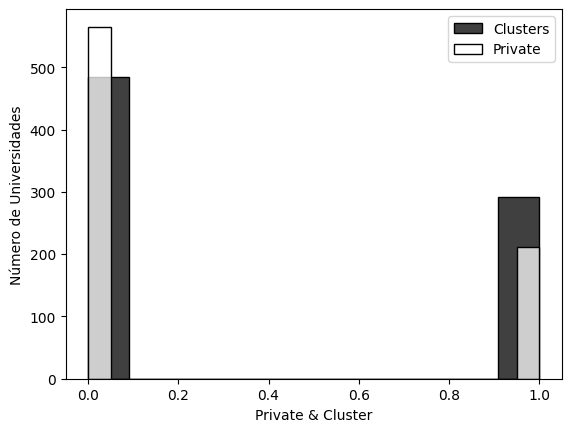

In [ ]:
z= sns.histplot(data=college_df_normalized, x='Cluster', color = "black", label = 'Clusters')
z= sns.histplot(data=college_df_normalized, x='Private', color = "white", binwidth = 0.05, label = 'Private')
z.set_xlabel("Private & Cluster")
z.set_ylabel("Número de Universidades")
plt.legend()
plt.show()

##**Análise supervisionada**

### Usando base de dados reduzida para 2 dimensões

In [ ]:
college_df_normalized_supervisioned = college_df_normalized.copy()

In [ ]:
college_df_normalized_supervisioned.drop(['Cluster'], axis=1, inplace=True)

In [ ]:
# Reduz a dimensionalidade dos dados para 2 dimensões usando PCA
pca = PCA(n_components=2)
X_pca_supervisioned = pca.fit_transform(college_df_normalized_supervisioned)


				K-Means PCA Supervisionado

Tempo de Execução: 		0.0608s
Distância Intra-cluster: 	130.0620
Distância Inter-cluster: 	0.0000
Silhouette Score: 		0.6229


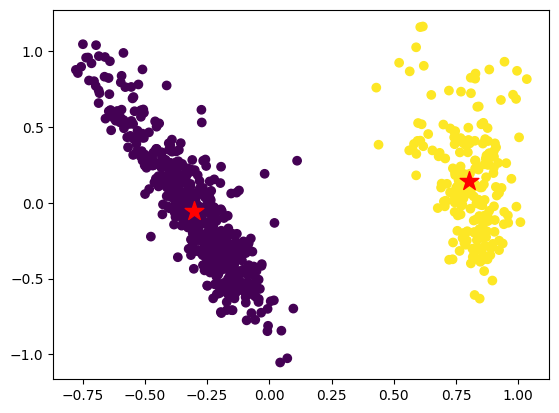

In [ ]:
kmeans_pca_supervisiond = Kmeans('PCA Supervisionado', K, 'random', RANDOM_STATE,N_INIT, MAX_ITER, X_pca_supervisioned, 1)

## ✏️ **Conclusão**

Resultados Supervisionados
              precision    recall  f1-score   support

           0       0.65      0.56      0.60       565
           1       0.14      0.20      0.17       212

    accuracy                           0.46       777
   macro avg       0.40      0.38      0.38       777
weighted avg       0.51      0.46      0.48       777



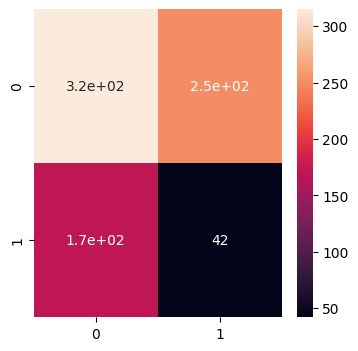

In [ ]:
report('Resultados Supervisionados', college_df_normalized['Private'], college_df_normalized['Cluster'])

In [ ]:
correct_predictions = 0
total_predictions = college_df_normalized.shape[0]

for index, row in college_df_normalized.iterrows():
  if row['Cluster'] == row['Private']:
    correct_predictions += 1

accuracy = correct_predictions/total_predictions
accuracy

0.4594594594594595